In [40]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)

In [41]:
# print the shapes of X and y
print(X.shape) # observations, features
print(y.shape) # observations

(150, 4)
(150,)


In [42]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [43]:
# print the encoding scheme for species: 0 = sentosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [44]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [45]:
# this is the four measurements for a new iris variable
# outputs a 2, which tells you it is a "virginica" iris
knn.predict([[3, 5, 4, 2]])

array([2])

In [46]:
# passing through 2 new observations through the model
# outputting two different types of irises (2, 1) based on how they were recoded
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

In [47]:
# kNN using a K=5
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


In [48]:
# train/test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)

In [49]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [50]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [51]:
# prints accuracy score for K=5
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [52]:
# for-loop tries K=1 through K=25 to find a 
# better value 
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

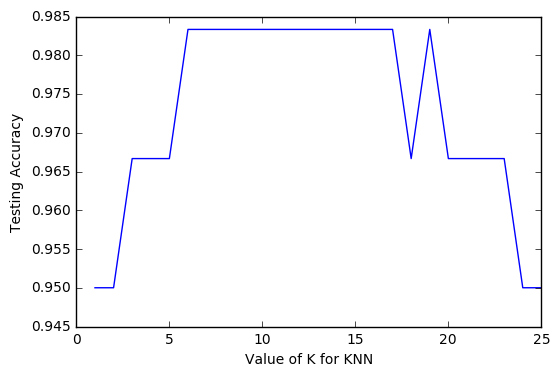

In [53]:
# plot the relationship between K and testing accuracy
# shows a K of 6-17 would be the most accurate
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [56]:
# instantiate the model with the best known parameters
knn = neighbors.KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make  prediction for out-of-sample observation
# predicts a 1, which is Versicolor
knn.predict([[3, 5, 4, 2]])

array([1])